In [1]:
import pandas as pd
import numpy as np
from tools.parsers import InterProParser, SemanticSimilarityParser
from tools.utils import assert_lexicographical_order, save_list_to_file
from tools.datasets import SemanticSimilarityDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
ip = InterProParser('../83333.interpro.out')
ip_dataset = ip.parse(ret_type='dataset')
ip_proteins = ip_dataset['Protein accession'].unique()
ip_features = ip_dataset.columns[~ip_dataset.columns.isin(['Protein accession'])].to_numpy()

In [3]:
ssp = SemanticSimilarityParser('../83333/bp.83333.ism_BP.txt')
ss_proteins, ss_dataset = ssp.load_matrix_pd()

In [4]:
ss_dataset['scaled_similarity'] = MinMaxScaler().fit_transform(ss_dataset['similarity'].to_numpy().reshape(-1,1))

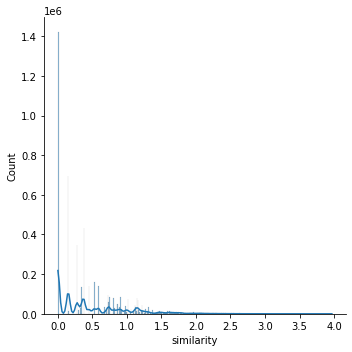

In [5]:
sns.displot(data=ss_dataset, x='similarity', kde=True)

In [6]:
common_proteins = np.intersect1d(ip_proteins, ss_proteins)
common_train, common_test = train_test_split(common_proteins, test_size=0.2)
common_train, common_val = train_test_split(common_train, test_size=0.25)

In [7]:
train_dir = '../83333/train_data'
val_dir = '../83333/val_data'
test_dir = '../83333/test_data'

for i in [train_dir, test_dir, val_dir]:
    if not os.path.exists(i):
        os.makedirs(i)

In [8]:
condition_train = ip_dataset['Protein accession'].isin(common_train)
X_train = ip_dataset[condition_train].copy().reset_index(drop=True)
X_train.to_csv(os.path.join(train_dir, 'interpro.tab'), sep='\t', index=False)

condition_val = ip_dataset['Protein accession'].isin(common_val)
X_val = ip_dataset[condition_val].copy().reset_index(drop=True)
X_val.to_csv(os.path.join(val_dir, 'interpro.tab'), sep='\t', index=False)

condition_test = ip_dataset['Protein accession'].isin(common_test)
X_test = ip_dataset[condition_test].copy().reset_index(drop=True)
X_test.to_csv(os.path.join(test_dir, 'interpro.tab'), sep='\t', index=False)

In [9]:
condition_train = ss_dataset['protein1'].isin(common_train) & ss_dataset['protein2'].isin(common_train)
y_train = ss_dataset[condition_train].copy().reset_index(drop=True)
y_train.to_csv(os.path.join(train_dir, 'bp-ss.tab'), sep='\t', index=False)

condition_val = ss_dataset['protein1'].isin(common_val) & ss_dataset['protein2'].isin(common_val)
y_val = ss_dataset[condition_val].copy().reset_index(drop=True)
y_val.to_csv(os.path.join(val_dir, 'bp-ss.tab'), sep='\t', index=False)

condition_test = ss_dataset['protein1'].isin(common_test) & ss_dataset['protein2'].isin(common_test)
y_test = ss_dataset[condition_test].copy().reset_index(drop=True)
y_test.to_csv(os.path.join(test_dir, 'bp-ss.tab'), sep='\t', index=False)

In [ ]:
X_test[X_test['Protein accession'] == 'C1P615'][ip_features].values.shape


In [ ]:
ip_dict = {}
for protein in X_test['Protein accession'].unique():
    ip_dict[protein] = X_test[X_test['Protein accession'] == protein][ip_features].to_numpy().flatten()

In [14]:
common_train.shape

(1362,)

In [15]:
y_train

,protein1,protein2,similarity,scaled_similarity
0,C1P607,C1P607,3.069425,0.773387
1,C1P607,C1P615,3.066960,0.772766
2,C1P607,O32528,0.374140,0.094270
3,C1P607,P00350,0.374140,0.094270
4,C1P607,P00363,0.374140,0.094270
...,...,...,...,...
1855039,Q93K97,Q47690,0.806466,0.203201
1855040,Q93K97,Q59385,0.806466,0.203201
1855041,Q93K97,Q6BF16,0.000000,0.000000
1855042,Q93K97,Q6BF25,0.000000,0.000000
